## Ceneo Analyzer

## Loading libreries

In [30]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Listing codes for all products for which opinions have been extracted

In [31]:
if os.path.exists("opinions"):
    print(*[filename.split(".")[0] for filename in os.listdir("opinions")],sep="\n")


56288424
80905320


## Specifying about which product opinions are to be analyzed

In [32]:
product_id = input("Please provide Ceneo.pl product code")

## Importing opinions from JSON file to pandas.DataFrames object

In [33]:
opinions = pd.read_json(f"opinions/{product_id}.json")
MAX_SCORE = 5
opinions.score = opinions.score.apply(lambda s: round(s*MAX_SCORE,1))

In [ ]:
opinions

## Basic statistics

In [34]:

opinions_count = len(opinions)
pros_count = opinions.pros.apply(lambda p: None if not p else p).count()
cons_count =opinions.cons.apply(lambda c: None if not c else c).count()
average_score = opinions.score.mean()

## Basic charts

### Score histogram

[Text(0, 0, ''),
 Text(0, 0, '11'),
 Text(0, 0, '9'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '14')]

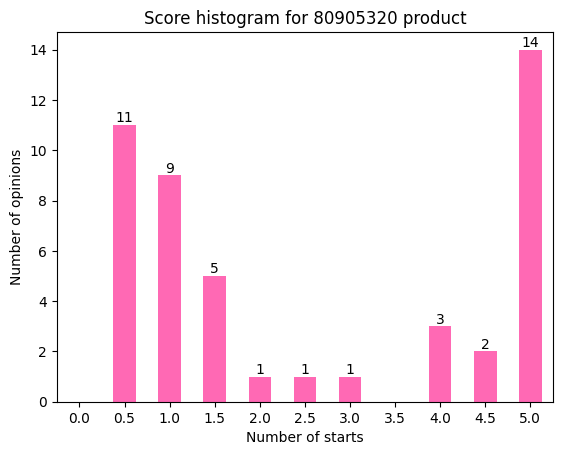

In [35]:
score_distribution = opinions.score.value_counts().reindex(np.arange(0,5.5,0.5))
fog, ax =plt.subplots()
score_distribution.plot.bar(color="hotpink")
plt.xlabel("Number of starts")
plt.ylabel("Number of opinions")
plt.title(f"Score histogram for {product_id} product")
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], label_type="edge",fmt = lambda l: int(l) if l else "")

### Recommendation shares

Text(0.5, 1.0, 'Score histogram for 80905320 product')

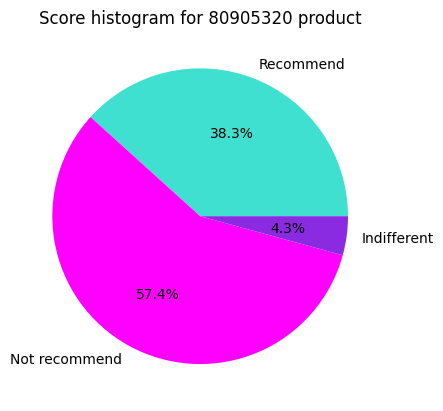

In [46]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex([True, False, np.nan],fill_value = 0)
recommendation_distribution.plot.pie(
    labels = ["Recommend", "Not recommend", "Indifferent"],
    label = "",
    colors=["turquoise", "magenta", "blueviolet"],
    autopct = lambda l: "{:1.1f}%".format(l) if l else ""
)
plt.title(f"Score histogram for {product_id} product")